## **SVM classifer on MNIST**

In this notebook, we will implement **multiclass MNIST digit recognition classifier** with **SVM's**.

#### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

# Import the libraries for performing classification 
from keras.datasets import mnist 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import cross_val_score ,train_test_split ,GridSearchCV ,StratifiedShuffleSplit

#### **Loading MNIST dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Flatten each input image into a vector of length 784

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

Normalizing

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape ,y_train.shape ,X_test.shape ,y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

Let us consider the first 10000 images in training dataset and first 2000 images in testing dataset.

In [6]:
X_train = X_train[0:10000, :]
y_train = y_train[0:10000]

X_test = X_test[0:2000, :]
y_test = y_test[0:2000]

### **Linear SVM for MNIST multiclass classification**

#### **Using Pipeline**

In [7]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                   ('classifier', SVC(kernel='linear', C=1))])

pipe_1.fit(X_train, y_train.ravel())

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=1, kernel='linear'))])

Evaluate the model using crossvalidation

In [8]:
accuracy = cross_val_score(pipe_1, X_train, y_train.ravel(), cv=3)
print('Training Accuracy : {:.4f}'.format(accuracy.mean()*100))

Training Accuracy : 91.3799


Visualizing the confusion matrix 

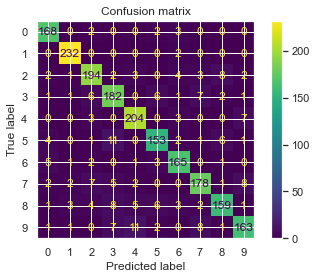

In [9]:
y_pred = pipe_1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()

Printing classification report 

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



### **Nonlinear SVM for MNIST multiclass classification**

#### **Using Pipeline**

In [11]:
pipe_2 = Pipeline([('scalerr', MinMaxScaler()),
                   ('classifier', SVC(kernel='rbf', gamma=0.1, C=1))])

pipe_2.fit(X_train, y_train.ravel())

Pipeline(steps=[('scalerr', MinMaxScaler()),
                ('classifier', SVC(C=1, gamma=0.1))])

Evaluate the model using crossvalidation

In [12]:
accuracy = cross_val_score(pipe_2, X_train, y_train.ravel(), cv=2)
print('Training Accuracy : {:.4f}'.format(accuracy.mean()*100))

Training Accuracy : 82.8700


Visualizing the confusion matrix 

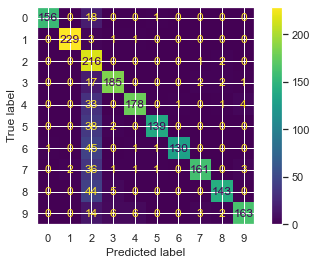

In [13]:
y_pred = pipe_2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

Printing classification report 

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



#### **Using GridSearchCV**

We can use a grid search cross-validation to explore combinations of parameters. 

Here we will adjust `C` (which controls the margin hardness) and `gamma` (which controls the size of the radial basis function kernel), and determines the best models.

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

takes a very long amount of time to finish training (for me it took about 7 hrs)

In [17]:
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [22]:
grid.best_params_

{'C': 10.0, 'gamma': 0.001}

In [24]:
grid.best_score_

0.9453333333333332